# **FRAMEWORKS DE DEEPLEARNING**
# **Prática - Keras**
**Autor**: Renan Santos Mendes

**Email**: renansantosmendes@gmail.com

**Descrição**: Este notebook apresenta um exemplo de uma rede neural profunda com mais de uma camada para um problema de classificação.


# **Saúde Fetal**

As Cardiotocografias (CTGs) são opções simples e de baixo custo para avaliar a saúde fetal, permitindo que os profissionais de saúde atuem na prevenção da mortalidade infantil e materna. O próprio equipamento funciona enviando pulsos de ultrassom e lendo sua resposta, lançando luz sobre a frequência cardíaca fetal (FCF), movimentos fetais, contrações uterinas e muito mais.

Este conjunto de dados contém 2126 registros de características extraídas de exames de Cardiotocografias, que foram então classificados por três obstetras especialistas em 3 classes:

- Normal
- Suspeito
- Patológico

# 1 - Importando os módulos necessários

In [1]:
import os
import tensorflow
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, InputLayer, Dropout
from keras.utils import to_categorical

from keras.callbacks import EarlyStopping
from keras.regularizers import l1, l2

import random
import numpy as np
import random as python_random
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Definindo funções adicionais

In [21]:
def plot_convergence(hist, metric):

  df = pd.DataFrame(hist.history)
  fig = px.line(df,
                x=np.arange(df[metric].shape[0]),
                y=[f'{metric}', f'val_{metric}'])
  fig.show()

def reset_seeds():
   os.environ['PYTHONHASHSEED']=str(42)
   tf.random.set_seed(42)
   np.random.seed(42)
   random.seed(42)

# 2 - Fazendo a leitura do dataset e atribuindo às respectivas variáveis

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/renansantosmendes/lectures-cdas-2023/master/fetal_health.csv')

In [3]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [5]:
data['fetal_health'].value_counts()

,count
fetal_health,
1.0,1655
2.0,295
3.0,176


# 3 - Preparando o dado antes de iniciar o treino do modelo

In [6]:
X=data.drop(["fetal_health"], axis=1)
y=data["fetal_health"] - 1

In [11]:
columns_names = list(X.columns)
X_df = preprocessing.StandardScaler().fit_transform(X)
X_df = pd.DataFrame(X_df, columns=columns_names)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.3, random_state=42)

y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [14]:
y_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

# 4 - Criando o modelo e adicionando as camadas

In [18]:
tensorflow.__version__

'2.17.0'

In [40]:
X_train.iloc[0].shape

(21,)

In [19]:
?Dense

In [47]:
reset_seeds()
model = Sequential()
model.add(InputLayer(shape=X_train.iloc[0].shape))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

In [24]:
from keras.utils import plot_model

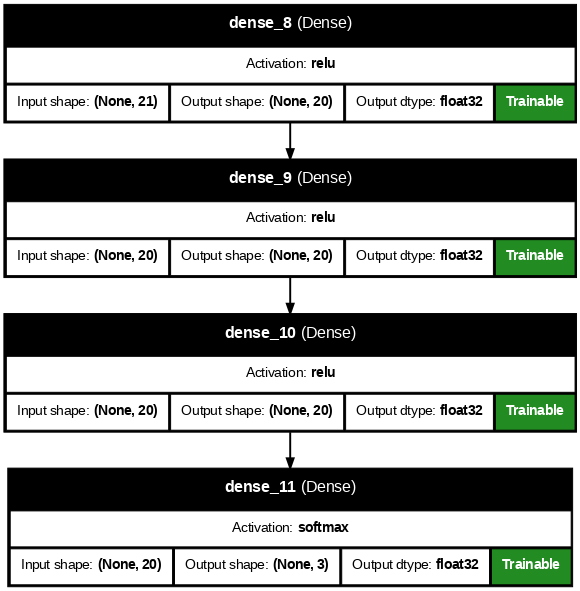

In [42]:
plot_model(model, to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=70,
    show_layer_activations=True,
    show_trainable=True)

In [43]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 20)                  │             440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │              63 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,343 (5.25 KB)

 Trainable params: 1,343 (5.25 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.trainable = True

In [35]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 20)                  │             460 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │              63 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,363 (5.32 KB)

 Trainable params: 1,363 (5.32 KB)

 Non-trainable params: 0 (0.00 B)

# 5 - Compilando o modelo


In [48]:
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

# 6 - Executando o treino do modelo

In [36]:
?Sequential

In [49]:
%%time
hist = model.fit(x=X_train,
                 y=y_train,
                 epochs=25,
                 validation_split=0.2,
                 batch_size=128)

Epoch 1/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.4607 - loss: 1.0473 - val_accuracy: 0.7651 - val_loss: 0.8564
Epoch 2/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7606 - loss: 0.8431 - val_accuracy: 0.8255 - val_loss: 0.7279
Epoch 3/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7898 - loss: 0.7345 - val_accuracy: 0.8289 - val_loss: 0.6348
Epoch 4/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7955 - loss: 0.6577 - val_accuracy: 0.8322 - val_loss: 0.5639
Epoch 5/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7981 - loss: 0.5991 - val_accuracy: 0.8389 - val_loss: 0.5056
Epoch 6/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8017 - loss: 0.5499 - val_accuracy: 0.8423 - val_loss: 0.4575
Epoch 7/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8042 - loss: 0.5090 - val_accuracy: 0.8490 - val_loss: 0.4171
Epoch 8/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8053 - loss: 0.4735 - val_accuracy: 0.8456 - val_lo

In [51]:
hist.history

{'accuracy': [0.556302547454834,
  0.7756302356719971,
  0.7915966510772705,
  0.7966386675834656,
  0.8008403182029724,
  0.8042016625404358,
  0.8058823347091675,
  0.8058823347091675,
  0.8168067336082458,
  0.8260504007339478,
  0.8420168161392212,
  0.8554621934890747,
  0.8689075708389282,
  0.8747898936271667,
  0.8831932544708252,
  0.8848739266395569,
  0.8873949646949768,
  0.8924369812011719,
  0.894957959651947,
  0.9016806483268738,
  0.9050419926643372,
  0.9084033370018005,
  0.9117646813392639,
  0.9126050472259521,
  0.9134453535079956],
 'loss': [0.9872520565986633,
  0.8160361051559448,
  0.7155829071998596,
  0.6428835391998291,
  0.5863978862762451,
  0.5394328832626343,
  0.5006406903266907,
  0.4668450355529785,
  0.43704766035079956,
  0.41031187772750854,
  0.38683149218559265,
  0.36645936965942383,
  0.34845784306526184,
  0.33195093274116516,
  0.3169076442718506,
  0.30353298783302307,
  0.2912798821926117,
  0.28023475408554077,
  0.2705707848072052,
  0.2

# 6.1 Avaliando o modelo

# 6.2 Plotando a acurácia do modelo

In [52]:
plot_convergence(hist, 'loss')

# DagsHub
<img src="https://api.flatworld.co/wp-content/uploads/2020/10/DAGsHub-Logo.png" height=100>


DagsHub é uma plataforma de colaboração e compartilhamento de código voltada para a comunidade de Ciência de Dados e Machine Learning. É uma plataforma que permite que os desenvolvedores, cientistas de dados e pesquisadores compartilhem seus projetos, coletem feedback de outros usuários, colaborem em projetos em equipe e gerenciem seu fluxo de trabalho de desenvolvimento de forma mais eficiente.

A plataforma é baseada em Git e Git-LFS, o que significa que o controle de versão e o gerenciamento de arquivos são suportados nativamente. Além disso, o DagsHub oferece uma série de recursos adicionais que visam melhorar a experiência de desenvolvimento de projetos de Ciência de Dados e Machine Learning, como integração com ferramentas de treinamento de modelos, ambientes de execução, Jupyter notebooks e fluxos de trabalho de DAGs (gráficos acíclicos direcionados).


Com o DagsHub, os usuários podem compartilhar seus projetos publicamente ou limitar o acesso a equipes específicas, criando uma comunidade de colaboração de dados e Machine Learning mais ampla. A plataforma também incentiva a colaboração em projetos de código aberto, com recursos para facilitar a contribuição e a revisão de código pelos usuários.

Em resumo, o DagsHub é uma plataforma completa para compartilhamento, colaboração e gerenciamento de projetos de Ciência de Dados e Machine Learning, que tem como objetivo tornar o trabalho em equipe mais fácil e eficiente para os usuários.

### [Link](https://dagshub.com/) para acesso.

In [ ]:
!pip install mlflow dagshub

In [ ]:
import mlflow
import dagshub

mlflow.tensorflow.autolog()
dagshub.init("repository_name","username")